In [93]:
pip install word2number

In [95]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from word2number import w2n
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
df=pd.read_csv("/content/drive/MyDrive/DataSet/hr_data.csv")
df.head()

,experience,test_score(out of 10),interview_score(out of 10),cgpa(out of 10),salary($)
0,NaN,8.0,9,9,50000
1,NaN,8.0,6,8,45000
2,five,6.0,7,8,60000
3,two,10.0,10,10,65000
4,seven,9.0,6,9,70000


In [98]:
df.experience=df.experience.fillna('zero')

In [99]:
df.rename(columns={'test_score(out of 10)':'test_score','interview_score(out of 10)':'int_score','cgpa(out of 10)':'cgpa'},inplace=True)
df

,experience,test_score,int_score,cgpa,salary($)
0,zero,8.0,9,9,50000
1,zero,8.0,6,8,45000
2,five,6.0,7,8,60000
3,two,10.0,10,10,65000
4,seven,9.0,6,9,70000
5,three,7.0,10,9,62000
6,ten,NaN,7,7,72000
7,eleven,7.0,8,8,80000


In [100]:
df.experience=df.experience.apply(w2n.word_to_num)
df

,experience,test_score,int_score,cgpa,salary($)
0,0,8.0,9,9,50000
1,0,8.0,6,8,45000
2,5,6.0,7,8,60000
3,2,10.0,10,10,65000
4,7,9.0,6,9,70000
5,3,7.0,10,9,62000
6,10,NaN,7,7,72000
7,11,7.0,8,8,80000


In [101]:
import math
mean_test_score=math.floor(df['test_score'].mean())
mean_test_score

7

In [102]:
df.test_score=df.test_score.fillna(mean_test_score)
df

,experience,test_score,int_score,cgpa,salary($)
0,0,8.0,9,9,50000
1,0,8.0,6,8,45000
2,5,6.0,7,8,60000
3,2,10.0,10,10,65000
4,7,9.0,6,9,70000
5,3,7.0,10,9,62000
6,10,7.0,7,7,72000
7,11,7.0,8,8,80000


In [121]:
x=df[['experience','test_score','int_score','cgpa']]
y=df['salary($)']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

In [122]:
lr = linear_model.LinearRegression()
lr.fit(x,y)

LinearRegression()

In [123]:
lr.predict(x_test)

array([59597.85433833, 72100.37051374, 64246.77874247, 44340.12608527])

In [124]:
y_test

2    60000
6    72000
3    65000
1    45000
Name: salary($), dtype: int64

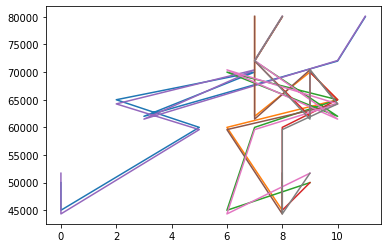

In [125]:
plt.plot(x,y)
y_pred_lr=lr.predict(x)
plt.plot(x,y_pred_lr)
plt.show()

In [126]:
p=lr.predict(x)
df['predicted']=p

In [127]:
p

array([51706.07753138, 44340.12608527, 59597.85433833, 64246.77874247,
       70405.65724714, 61495.07825029, 72100.37051374, 80108.05729138])

In [128]:
df.to_csv("prediction.csv")

In [129]:
lg=linear_model.LogisticRegression()
lg.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [130]:
y_pred=lg.predict([['5','6','7','7']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


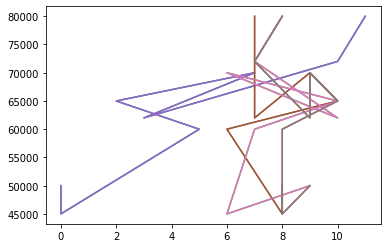

In [133]:
y_pred_lg=lg.predict(x)
plt.plot(x,y)
plt.plot(x,y_pred_lg)
plt.show()